# Exam on Convolutional Neural Networks (CNN)

Welcome to the Convolutional Neural Networks (CNN) practical exam. In this exam, you will work on an image classification task to predict the type of traffic sign. You are provided with a dataset of traffic sign images, and your task is to build, train, and evaluate a CNN model.

---

## Dataset Overview
### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1HwMV-Lt_sWoxc5v6igmTxTwomS3DR6cQ/view?usp=sharing)
### **Dataset Name:** Traffic Signs

### **Description:**  
The dataset contains images of various German traffic signs labeled for classification purposes. Each image belongs to one of the 43 classes, representing different types of traffic signs.

### **Labels:**
```python
classes = {
    0:  'Speed limit (20km/h)',
    1:  'Speed limit (30km/h)',
    2:  'Speed limit (50km/h)',
    3:  'Speed limit (60km/h)',
    4:  'Speed limit (70km/h)',
    5:  'Speed limit (80km/h)',
    6:  'End of speed limit (80km/h)',
    7:  'Speed limit (100km/h)',
    8:  'Speed limit (120km/h)',
    9:  'No passing',
    10: 'No passing veh over 3.5 tons',
    11: 'Right-of-way at intersection',
    12: 'Priority road',
    13: 'Yield',
    14: 'Stop',
    15: 'No vehicles',
    16: 'Veh > 3.5 tons prohibited',
    17: 'No entry',
    18: 'General caution',
    19: 'Dangerous curve left',
    20: 'Dangerous curve right',
    21: 'Double curve',
    22: 'Bumpy road',
    23: 'Slippery road',
    24: 'Road narrows on the right',
    25: 'Road work',
    26: 'Traffic signals',
    27: 'Pedestrians',
    28: 'Children crossing',
    29: 'Bicycles crossing',
    30: 'Beware of ice/snow',
    31: 'Wild animals crossing',
    32: 'End speed + passing limits',
    33: 'Turn right ahead',
    34: 'Turn left ahead',
    35: 'Ahead only',
    36: 'Go straight or right',
    37: 'Go straight or left',
    38: 'Keep right',
    39: 'Keep left',
    40: 'Roundabout mandatory',
    41: 'End of no passing',
    42: 'End no passing veh > 3.5 tons'
}
```



## Load Data
Run the following command to get the data and unzip it, alternatively you can access the data [here](https://drive.google.com/file/d/1HwMV-Lt_sWoxc5v6igmTxTwomS3DR6cQ/view?usp=sharing).

In [1]:
#https://drive.google.com/file/d/1HwMV-Lt_sWoxc5v6igmTxTwomS3DR6cQ/view?usp=sharing
!pip install gdown
!gdown --id 1HwMV-Lt_sWoxc5v6igmTxTwomS3DR6cQ
!unzip Traffic_Signs.zip

Streaming output truncated to the last 5000 lines.
 extracting: Traffic_Signs/Dataset/13/00013_00004_00022.png  
  inflating: Traffic_Signs/Dataset/13/00013_00021_00029.png  
  inflating: Traffic_Signs/Dataset/13/00013_00003_00023.png  
 extracting: Traffic_Signs/Dataset/13/00013_00063_00007.png  
 extracting: Traffic_Signs/Dataset/13/00013_00034_00029.png  
  inflating: Traffic_Signs/Dataset/13/00013_00045_00013.png  
  inflating: Traffic_Signs/Dataset/13/00013_00068_00019.png  
 extracting: Traffic_Signs/Dataset/13/00013_00003_00004.png  
 extracting: Traffic_Signs/Dataset/13/00013_00017_00010.png  
 extracting: Traffic_Signs/Dataset/13/00013_00046_00003.png  
  inflating: Traffic_Signs/Dataset/13/00013_00057_00008.png  
 extracting: Traffic_Signs/Dataset/13/00013_00058_00011.png  
 extracting: Traffic_Signs/Dataset/13/00013_00063_00017.png  
 extracting: Traffic_Signs/Dataset/13/00013_00002_00013.png  
 extracting: Traffic_Signs/Dataset/13/00013_00002_00006.png  
  inflating: Traffi

## Import Libraries

In [2]:

import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

## Data Preprocessing
In this section, preprocess the dataset by:
- Loading the images from the file paths.
- Resizing the images to a consistent size.
- Normalizing pixel values.

Add more if needed!

In [9]:
def filter_jpg(file_path):
    return file_path.endswith('.jpg')
for file in os.listdir('/content/Traffic_Signs/Dataset'):
    if not filter_jpg(file):
        print(f"File {file} .")




File 28 .
File 22 .
File 16 .
File 7 .
File 33 .
File 30 .
File 14 .
File 5 .
File 29 .
File 9 .
File 15 .
File 39 .
File 40 .
File 23 .
File 38 .
File 0 .
File 1 .
File 19 .
File 26 .
File 10 .
File 36 .
File 6 .
File 41 .
File 18 .
File 27 .
File 4 .
File 3 .
File 2 .
File 42 .
File 12 .
File 25 .
File 8 .
File 21 .
File 20 .
File 32 .
File 11 .
File 34 .
File 37 .
File 13 .
File 17 .
File 24 .
File 35 .
File 31 .


In [12]:
import os
from PIL import Image
import matplotlib.pyplot as plt


directory_path = '/content/Traffic_Signs/Dataset'


for filename in os.listdir(directory_path):
    file_path = os.path.join(directory_path, filename)

    if os.path.isfile(file_path) and filename.endswith(('.png', '.jpg', '.jpeg')):
        img = Image.open(file_path)
        plt.figure()
        plt.imshow(img)
        plt.axis('off')
        plt.show()


## Data Splitting
In this section, we will split our dataset into three parts:

* Training set (70%).
* Validation set (15%).
* Test set (15%).

In [18]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)

train_generator = datagen.flow_from_directory('/content/Traffic_Signs/Dataset', target_size=(224, 224), batch_size=32, class_mode='binary', subset='training')
validation_generator = datagen.flow_from_directory('/content/Traffic_Signs/Dataset', target_size=(224, 224), batch_size=32, class_mode='binary', subset='validation')


Found 33337 images belonging to 43 classes.
Found 5872 images belonging to 43 classes.


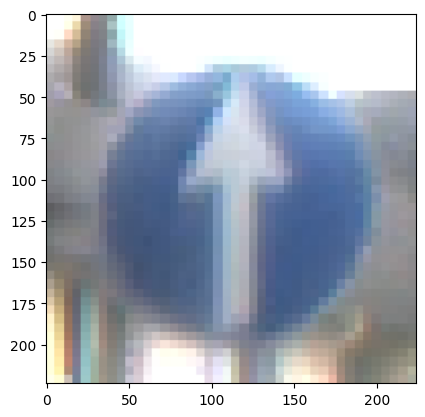

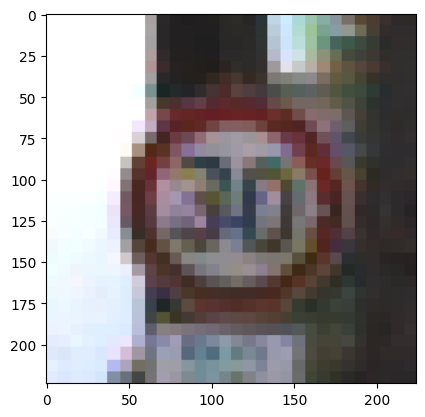

In [20]:
plt.imshow(train_generator[0][0][0])
plt.show()
plt.imshow(train_generator[0][0][5])
plt.show()

## Building the CNN Model
In this section, define the architecture of the CNN model. The architecture may consist of:
- Convolutional layers with max-pooling
- Dropout layers
- Flatten layer
- Dense layers
- Output layer

Add and remove any of these as needed!

In [21]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.20))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Training the Model
Train the CNN model using the training data and validate it on the validation set.

In [22]:
training_samples = 500
validation_samples = 50
steps_per_epoch = training_samples // train_generator.batch_size
validation_steps = validation_samples // validation_generator.batch_size

In [23]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [25]:
history = model.fit(train_generator,epochs=10,steps_per_epoch=steps_per_epoch,validation_data=validation_generator,validation_steps=validation_steps)

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 66s 4s/step - accuracy: 0.0521 - loss: -207681.2500 - val_accuracy: 0.0312 - val_loss: -3182423.7500
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 61s 4s/step - accuracy: 0.0837 - loss: -9379171.0000 - val_accuracy: 0.0312 - val_loss: -63436120.0000
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 64s 4s/step - accuracy: 0.0698 - loss: -130919328.0000 - val_accuracy: 0.0312 - val_loss: -690156352.0000
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 64s 4s/step - accuracy: 0.0536 - loss: -1125136640.0000 - val_accuracy: 0.0625 - val_loss: -4008395776.0000
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 61s 4s/step - accuracy: 0.0555 - loss: -5583624704.0000 - val_accuracy: 0.0625 - val_loss: -13569591296.0000
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 63s 4s/step - accuracy: 0.0351 - loss: -20602828800.0000 - val_accuracy: 0.0312 - val_loss: -58677239808.0000
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 62s 4s/step - accuracy: 0.0401 - loss: -53639905280.0000 - val_accuracy: 0.0625 - val_loss: -1363

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [26]:
model.evaluate(validation_generator)

184/184 ━━━━━━━━━━━━━━━━━━━━ 193s 1s/step - accuracy: 0.0551 - loss: -1276345581568.0000


[-1289639690240.0, 0.056709811091423035]

## Make Predictions
Use the trained model to make predictions on new or unseen traffic sign images.

if you need new, we prepared some data for you [here](https://drive.google.com/file/d/1S_vpQntND9839x8kJpegaEgtSIA4JxHO/view?usp=sharing), or you can simply run the following command to get the data and unzip it.

<small>Note: please note that the file contain MetaData to tell you what each image contains <b>THIS IS JUST FOR YOU TO MAKE SURE</b></smmall>

In [27]:
#https://drive.google.com/file/d/1S_vpQntND9839x8kJpegaEgtSIA4JxHO/view?usp=sharing
!gdown --id 1S_vpQntND9839x8kJpegaEgtSIA4JxHO
!unzip Test_Dataset.zip

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1S_vpQntND9839x8kJpegaEgtSIA4JxHO

but Gdown can't. Please check connections and permissions.
unzip:  cannot find or open Test_Dataset.zip, Test_Dataset.zip.zip or Test_Dataset.zip.ZIP.


In [28]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    '/content/Traffic_Signs',
    target_size=(224, 224),
    batch_size=1,
    class_mode='binary',
    shuffle=False
)

Found 39209 images belonging to 1 classes.


In [29]:
predictions = model.predict(test_generator)

39209/39209 ━━━━━━━━━━━━━━━━━━━━ 2012s 51ms/step


## Model Performance Visualization
Visualize performance metrics such as accuracy and loss over the epochs.

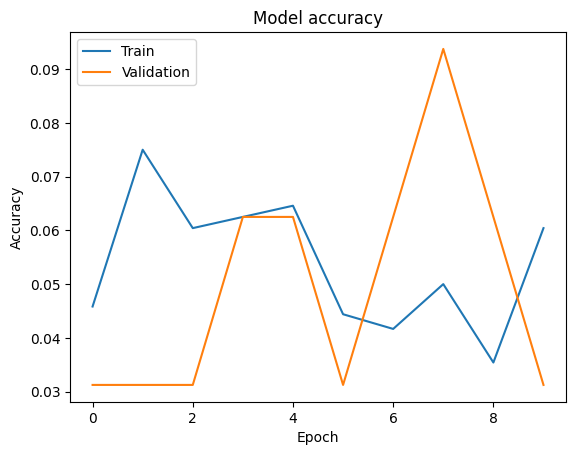

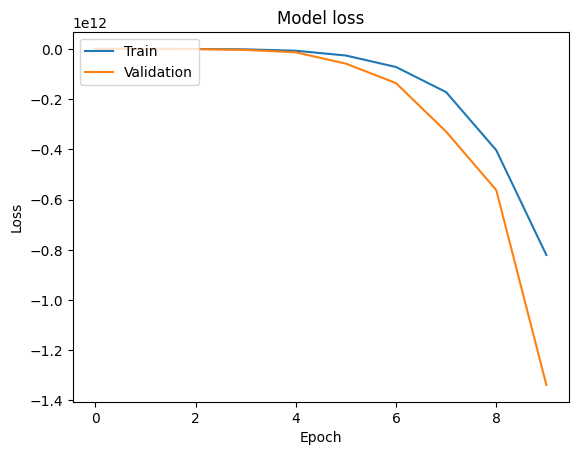

In [31]:
# prompt: Visualize performance metrics such as accuracy and loss over the epochs.

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


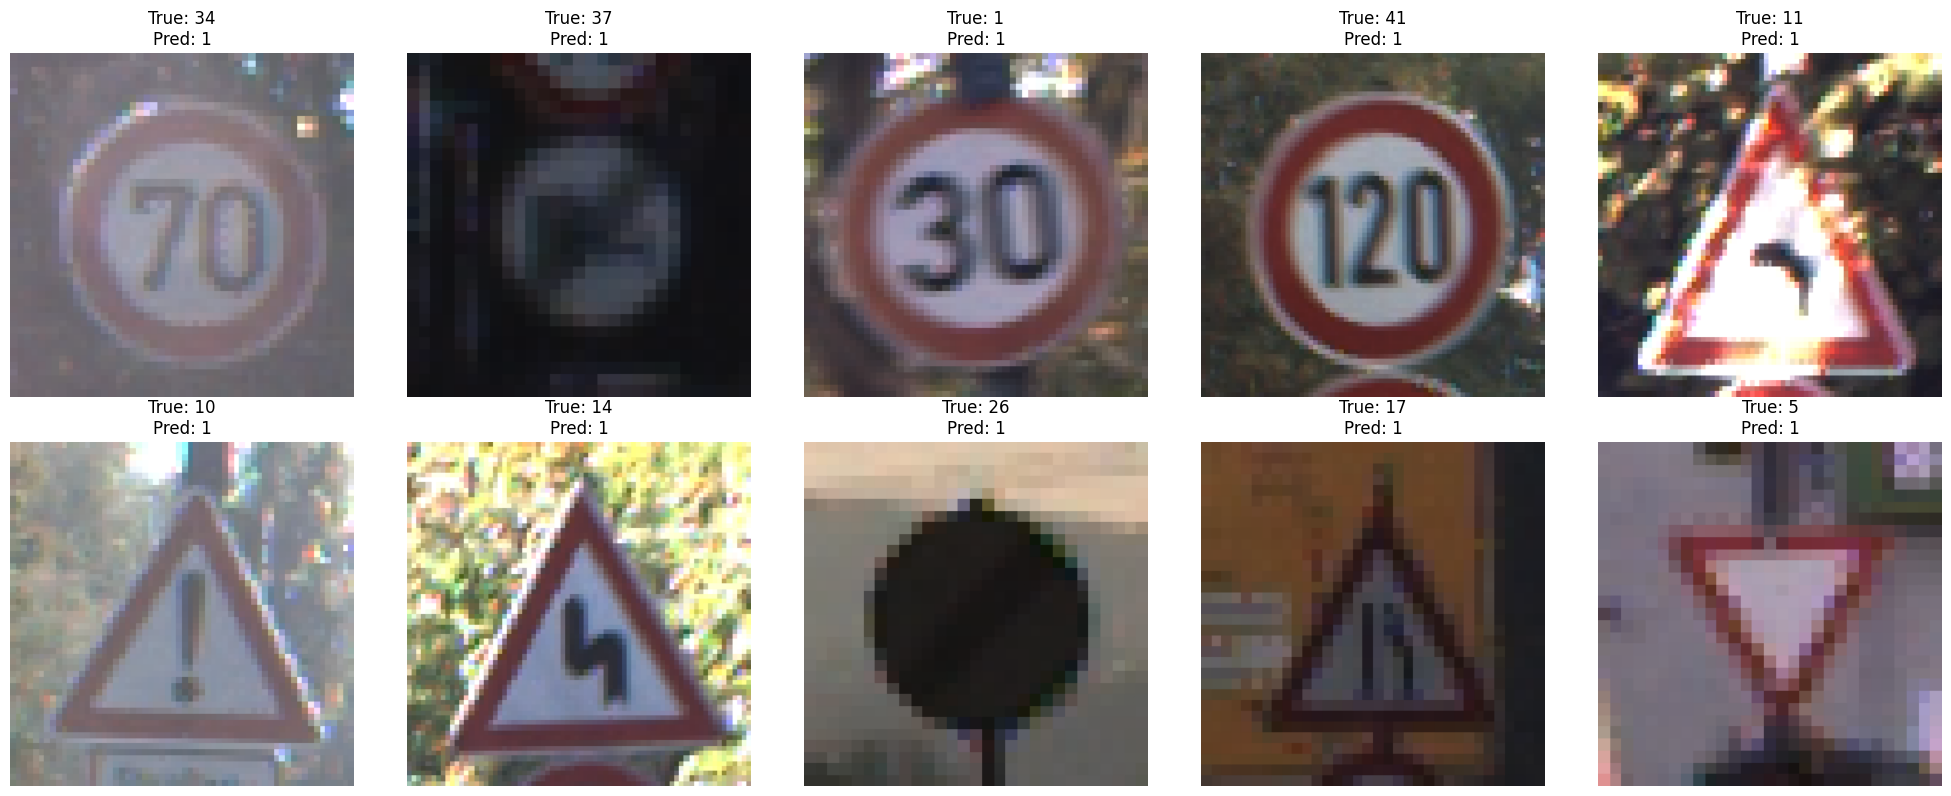

In [32]:
fig, axes = plt.subplots(2, 5, figsize=(20, 8))

for i, ax in enumerate(axes.flat):
    image = validation_generator[i][0][0]
    true_label = validation_generator[i][1][0]

    result = model.predict(image.reshape(1, 224, 224, 3))
    predicted_label = (result[0][0] > 0.5).astype(int) # Convert prediction to 0 or 1

    ax.imshow(image)
    ax.set_title(f'True: {int(true_label)}\nPred: {predicted_label}')
    ax.axis('off')

plt.tight_layout()
plt.show()

## Save the Model
Save the trained CNN model for submission.

In [33]:
model.save('cnn_model.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., resizing images, normalization, data augmentation). How do these preprocessing steps improve the performance of your CNN model?
2. **Model Architecture**: Describe the architecture of your CNN model (e.g., number of convolutional layers, kernel sizes, pooling layers). Why did you choose this structure, and how do you expect each layer to contribute to feature extraction?
3. **Activation Functions**: Justify your choice of activation functions. How do they influence the training and output of your CNN?
4. **Training Process**: Discuss your choice of batch size, number of epochs, and optimizer. How did these decisions impact the training process and the convergence of the model?
5. **Loss Function and Metrics**: Explain why you chose the specific loss function and evaluation metrics for this classification task. How do they align with the goal of correctly classifying traffic signs?
6. **Regularization Techniques**: If you used regularization methods like dropout or batch normalization, explain why you implemented them and how they helped prevent overfitting in your model.
7. **Model Evaluation**: Justify the method you used to evaluate your model's performance on the test set. Why did you select these evaluation techniques, and what insights did they provide about your model's accuracy and generalization ability?
8. **Model Visualization**: Explain the significance of the performance visualizations (e.g., accuracy and loss curves). What do they tell you about your model's training process and its ability to generalize?
9. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:

here we use cnn modle to find  the imgaes and train the data to find pic and there meaning and i put small epcho because i did not have time to big epcho and i want to explain more but i dont have time